# 02 Stark Family

![](https://images.unsplash.com/photo-1515255384510-23e8b6a6ca3c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1189&q=80)

Photo by [mauRÍCIO santos](https://unsplash.com/photos/N1gFsYf9AI0)

In this exercise, you will make your own face recognition system and apply to some examples.

First, you have to install some dependencies:
- `pip install cmake`
- `pip install dlib`

It might take a couple of minutes, especially dlib.

Then you can install the face recognition library:
`pip install face_recognition`

## I. Warm up

Once all is installed, you can import the `face_recognition` library.

In [13]:
# TODO: import face_recognition library
### STRIP_START ###
import face_recognition
### STRIP_END ###

First, we will play with the face recognition library and the distance.

Begin by loading and displaying the pictures of Mark Zuckerberg: `Mark1.jpg`, `Mark2.jpg` and `Mark3.jpg`

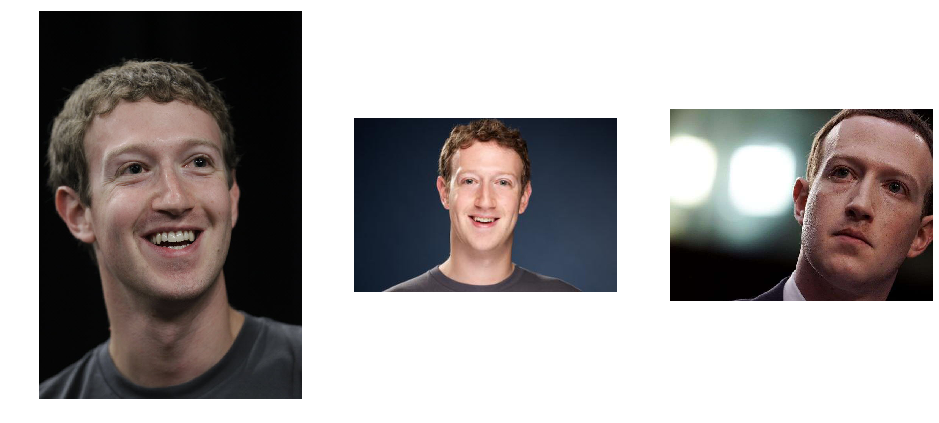

In [20]:
# TODO: load and display the images of Mark Zuckerberg
### STRIP_START ###
import matplotlib.pyplot as plt

mark1 = plt.imread("Mark1.jpg")
mark2 = plt.imread("Mark2.jpg")
mark3 = plt.imread("Mark3.jpg")

plt.figure(figsize=(16,10))
plt.subplot(131)
plt.axis('off')
plt.imshow(mark1)
plt.subplot(132)
plt.axis('off')
plt.imshow(mark2)
plt.subplot(133)
plt.axis('off')
plt.imshow(mark3)

### STRIP_END ###

Now, using `face_recognition`'s function `face_encodings`, compute the encoding of those three images and save them into variables.

In [21]:
# TODO: compute the embeddings of the images
### STRIP_START ###
mark1_embedding = face_recognition.face_encodings(mark1)
mark2_embedding = face_recognition.face_encodings(mark2)
mark3_embedding = face_recognition.face_encodings(mark3)

### STRIP_END ###

What is the output of the `face_encodings` function?

In what dimension is encoded a face (meaning how many numbers are computed for a face)?

In [23]:
# TODO: Play with the output and understand it
### STRIP_START ###
print('the output returns a list of encodings of 128 values per face')
### STRIP_END ###

the output returns a list of encodings of 128 values per face


Now compute and print the distance between those encodings, using euclidean distance.

Reminder: you can compute it easily using numpy!

In [24]:
# TODO: Compute the distance between encodings
### STRIP_START ###
print('distance between 1 and 2:', np.linalg.norm(mark1_embedding[0]-mark2_embedding[0]))

print('distance between 1 and 3:', np.linalg.norm(mark1_embedding[0]-mark3_embedding[0]))

print('distance between 2 and 3:', np.linalg.norm(mark2_embedding[0]-mark3_embedding[0]))

### STRIP_END ###

distance between 1 and 2: 0.2868917935351535
distance between 1 and 3: 0.38016210875889117
distance between 2 and 3: 0.3802702824106072


Now, using the same method, compute the distances between a picture of Mark Zuckerberg and Jesse Eisenberg, the actor playing his role in The Social Network (picture `Jesse.jpg`).

Compute also the distance between a picture of Mark Zuckerberg and Donald Trump (`Donald.jpg`)

In [25]:
# TODO: Compute the distance between an image of Mark Zuckerberg and Jesse Eisenberg
### STRIP_START ###
jesse = plt.imread("Jesse.jpg")
donald = plt.imread("Donald1.jpg")

jesse_embedding = face_recognition.face_encodings(jesse)
donald_embedding = face_recognition.face_encodings(donald)

print('distance between Mark1 and Jesse:', np.linalg.norm(jesse_embedding[0]-mark1_embedding[0]))
print('distance between Mark1 and Donald:', np.linalg.norm(donald_embedding[0]-mark1_embedding[0]))

### STRIP_END ###

distance between Mark1 and Jesse: 0.9426904557142537
distance between Mark1 and Donald: 0.8991897104711652


Based on those results, what could be a good threshold value, to make face recognition?

In other words, below what distance would you say this is the same person?

## II. Application to the Stark Family

Now that you master the basics, we will use a small database to recognize the Stark family in pictures. So you have the following folders:
- `train/arya`
- `train/jon`
- `train/robb`
- `train/sansa`

Within each folder, 4 pictures of the associated member of the family (sorry for the rest of the Stark family, feel free to add pictures of them if you want!).

### II.1. Encodings

Usually, when you want to make a face recognition, you already know who you want to recognize. This is our case here. So, instead of computing the encodings of all the people you want to recognize each time, you do it once at the beginning.

This is your first step: compute the encodings of each picture. 

Store the encodings of each member of the family into a dictionary of 4 members (with their names as keys), containing each a list of 4 encodings (one for each picture of the member).

In [30]:
# TODO: Compute the encodings of each member
### STRIP_START ###
import glob

arya_encodings = []
for path in glob.glob('train/arya/*.jpg'):
    arya_encodings.append(face_recognition.face_encodings(plt.imread(path))[0])

jon_encodings = []
for path in glob.glob('train/jon/*.jpg'):
    jon_encodings.append(face_recognition.face_encodings(plt.imread(path))[0])

    robb_encodings = []
for path in glob.glob('train/robb/*.jpg'):
    robb_encodings.append(face_recognition.face_encodings(plt.imread(path))[0])

sansa_encodings = []
for path in glob.glob('train/sansa/*.jpg'):
    sansa_encodings.append(face_recognition.face_encodings(plt.imread(path))[0])
    
encodings = {"arya": arya_encodings,
             "jon": jon_encodings,
             "robb": robb_encodings,
             "sansa": sansa_encodings}
### STRIP_END ###

### II.2. Threshold definition

Just to make sure you did the things right, we will compute all the distances of between all the possible images combinations in our dataset. This will allow us to define the threshold the best way.

To do so, you can begin by storing all the distances of a member with himself in a first array (e.g. distance between `robb01.jpg` and `robb02.jpg` etc...). This array should contain only distances below your defined threshold.

Then, do the same for pictures of a different member (e.g. distance between `robb01.jpg` and `sansa02.jpg`). This array should contain only distances above your defined threshold.

In [39]:
# TODO: Compute the distances and check the thhreshold
### STRIP_START ###

same_member_distances = []

for key in encodings:
    for i, encoding1 in enumerate(encodings[key]):
        for j, encoding2 in enumerate(encodings[key]):
            if i!=j:
                same_member_distances.append(np.linalg.norm(encoding1-encoding2))

print('max values for same member distance:', np.max(same_member_distances))


diff_member_distances = []

for key1 in encodings:
    for key2 in encodings:
        if key1!=key2:
            for i, encoding1 in enumerate(encodings[key1]):
                for j, encoding2 in enumerate(encodings[key2]):
                    diff_member_distances.append(np.linalg.norm(encoding1-encoding2))

print('min values for different member distance:', np.min(diff_member_distances))


### STRIP_END ###

max values for same member distance: 0.6194159156402003
min values for different member distance: 0.5203898288716324


Now, plot the histogram of your values for a same member, and your values for a different member of the family. On this histogram, you should be able to decide more easily what threshold to choose, and what it will cost.

a threshold at 0.55 or 0.6 would be the best choice, but might lead to errors at some point


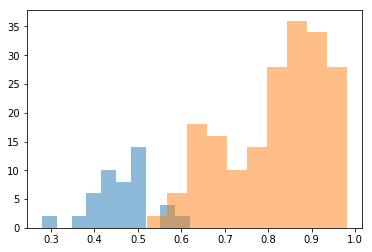

In [43]:
# TODO: Plot the histogram of the arrays computed in the previous question
### STRIP_START ###
plt.hist(same_member_distances, alpha=0.5)
plt.hist(diff_member_distances, alpha=0.5)
plt.plot()


print('a threshold at 0.55 or 0.6 would be the best choice, but might lead to errors at some point')
### STRIP_START ###

### II.3. Testing on new pictures

Now we will go to the real world, and test our algorithm in real pictures!

Real pictures may contain more than one member of the family, and even people that we don't know...

So now, have a look at the pictures in the folder `test`. And use your knowledge to make face recognition of those pictures!

To help you out you need to:
- use the encodings you computed
- compute the distances of **all** faces in the `test` images with at least one of each member in the `train` folder
- display the results in the image using `cv2.rectangle` for the box and `cv2.putText` for the name


In [55]:
test1_encodings

[array([-0.16328989,  0.09530257,  0.08951407, -0.08045837, -0.11698701,
        -0.00293513,  0.03373541, -0.110295  ,  0.20792986, -0.13101029,
         0.10969169, -0.05208343, -0.30077943,  0.0407659 , -0.00558406,
         0.24020633, -0.16324194, -0.18774721, -0.13564306, -0.1239774 ,
        -0.06498027,  0.14332531, -0.01511329,  0.11862714, -0.15903684,
        -0.3068983 , -0.03085053, -0.0332495 , -0.04103896, -0.07969402,
        -0.0321023 ,  0.13637409, -0.15172128, -0.01980529,  0.10160211,
         0.17412733, -0.05682568, -0.14870815,  0.17144625,  0.07234576,
        -0.28146839, -0.03801502,  0.12956449,  0.28013542,  0.19497368,
        -0.0704089 , -0.01760639, -0.09799994,  0.22866462, -0.36022031,
         0.00816224,  0.11649153,  0.07523981,  0.06581119,  0.06321178,
        -0.19744085,  0.02560363,  0.15591167, -0.22407423,  0.02751806,
         0.0987186 , -0.21222275, -0.03182101, -0.02332576,  0.12537645,
         0.1409795 , -0.13091311, -0.14323394,  0.1

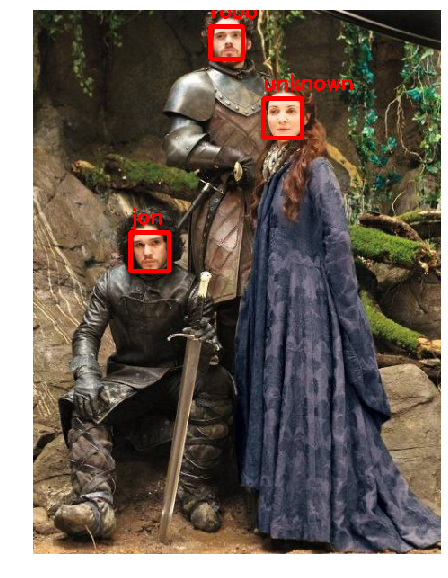

In [74]:
# TODO: Perform image recognition on the test images
### STRIP_START ###
import cv2

# Get the image
test1 = plt.imread('test/test01.jpg')

# Encode the faces
test1_encodings = face_recognition.face_encodings(test1)

family_member = []

# Loop over each encoded face
for test_encoding in test1_encodings:
    
    min_dist = 0.6
    min_key = "unknown"
    for key in encodings:
        for encoding in encodings[key]:
            dist = np.linalg.norm(encoding-test_encoding)
            if np.linalg.norm(encoding-test_encoding)<min_dist:
                min_dist = np.linalg.norm(encoding-test_encoding)
                min_key = key
    family_member.append(min_key)


# Get the faces boxes for viz
boxes = face_recognition.face_locations(test1)
    

for (top, right, bottom, left), member in zip(boxes, family_member):
    
    cv2.rectangle(test1, (left, top), (right, bottom), (255, 0, 0), 3)
    cv2.putText(test1, member, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

plt.figure(figsize=(16,10)) 
plt.axis('off')
plt.imshow(test1)
### STRIP_START ###

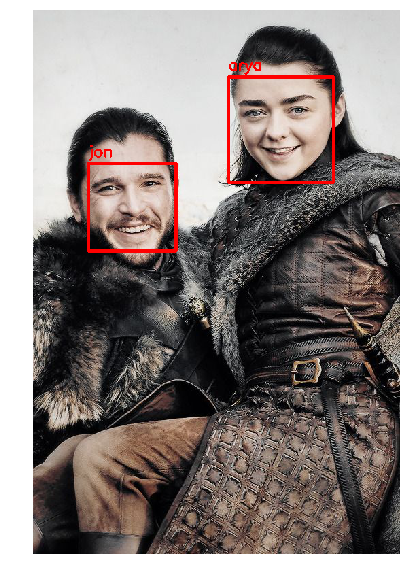

In [75]:
# TODO: Perform image recognition on the test images
### STRIP_START ###
import cv2

# Get the image
test1 = plt.imread('test/test02.jpg')

# Encode the faces
test1_encodings = face_recognition.face_encodings(test1)

family_member = []

# Loop over each encoded face
for test_encoding in test1_encodings:
    
    min_dist = 0.6
    min_key = "unknown"
    for key in encodings:
        for encoding in encodings[key]:
            dist = np.linalg.norm(encoding-test_encoding)
            if np.linalg.norm(encoding-test_encoding)<min_dist:
                min_dist = np.linalg.norm(encoding-test_encoding)
                min_key = key
    family_member.append(min_key)


# Get the faces boxes for viz
boxes = face_recognition.face_locations(test1)
    

for (top, right, bottom, left), member in zip(boxes, family_member):
    
    cv2.rectangle(test1, (left, top), (right, bottom), (255, 0, 0), 3)
    cv2.putText(test1, member, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

plt.figure(figsize=(16,10)) 
plt.axis('off')
plt.imshow(test1)
### STRIP_START ###

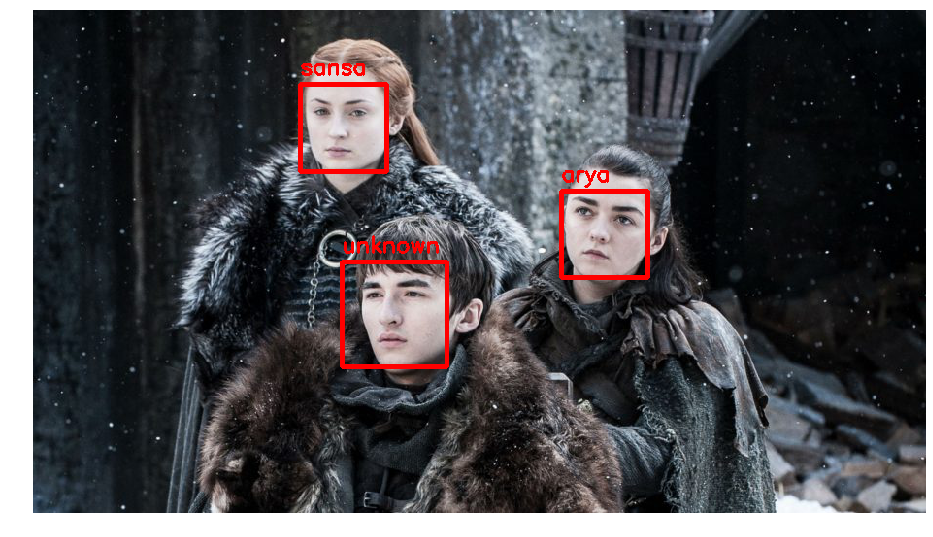

In [76]:
# TODO: Perform image recognition on the test images
### STRIP_START ###
import cv2

# Get the image
test1 = plt.imread('test/test03.jpg')

# Encode the faces
test1_encodings = face_recognition.face_encodings(test1)

family_member = []

# Loop over each encoded face
for test_encoding in test1_encodings:
    
    min_dist = 0.6
    min_key = "unknown"
    for key in encodings:
        for encoding in encodings[key]:
            dist = np.linalg.norm(encoding-test_encoding)
            if np.linalg.norm(encoding-test_encoding)<min_dist:
                min_dist = np.linalg.norm(encoding-test_encoding)
                min_key = key
    family_member.append(min_key)


# Get the faces boxes for viz
boxes = face_recognition.face_locations(test1)
    

for (top, right, bottom, left), member in zip(boxes, family_member):
    
    cv2.rectangle(test1, (left, top), (right, bottom), (255, 0, 0), 3)
    cv2.putText(test1, member, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

plt.figure(figsize=(16,10)) 
plt.axis('off')
plt.imshow(test1)
### STRIP_START ###

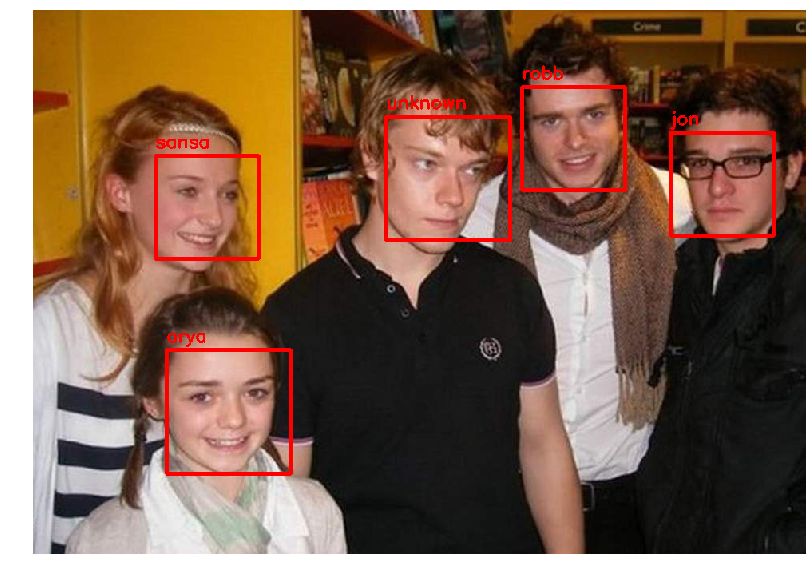

In [77]:
# TODO: Perform image recognition on the test images
### STRIP_START ###
import cv2

# Get the image
test1 = plt.imread('test/test04.jpg')

# Encode the faces
test1_encodings = face_recognition.face_encodings(test1)

family_member = []

# Loop over each encoded face
for test_encoding in test1_encodings:
    
    min_dist = 0.6
    min_key = "unknown"
    for key in encodings:
        for encoding in encodings[key]:
            dist = np.linalg.norm(encoding-test_encoding)
            if np.linalg.norm(encoding-test_encoding)<min_dist:
                min_dist = np.linalg.norm(encoding-test_encoding)
                min_key = key
    family_member.append(min_key)


# Get the faces boxes for viz
boxes = face_recognition.face_locations(test1)
    

for (top, right, bottom, left), member in zip(boxes, family_member):
    
    cv2.rectangle(test1, (left, top), (right, bottom), (255, 0, 0), 3)
    cv2.putText(test1, member, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

plt.figure(figsize=(16,10)) 
plt.axis('off')
plt.imshow(test1)
### STRIP_START ###

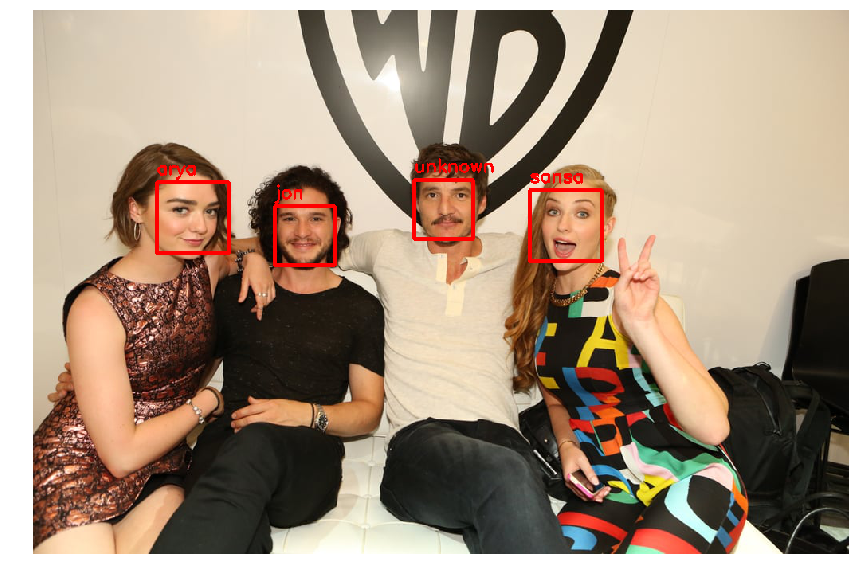

In [78]:
# TODO: Perform image recognition on the test images
### STRIP_START ###
import cv2

# Get the image
test1 = plt.imread('test/test05.jpg')

# Encode the faces
test1_encodings = face_recognition.face_encodings(test1)

family_member = []

# Loop over each encoded face
for test_encoding in test1_encodings:
    
    min_dist = 0.6
    min_key = "unknown"
    for key in encodings:
        for encoding in encodings[key]:
            dist = np.linalg.norm(encoding-test_encoding)
            if np.linalg.norm(encoding-test_encoding)<min_dist:
                min_dist = np.linalg.norm(encoding-test_encoding)
                min_key = key
    family_member.append(min_key)


# Get the faces boxes for viz
boxes = face_recognition.face_locations(test1)
    

for (top, right, bottom, left), member in zip(boxes, family_member):
    
    cv2.rectangle(test1, (left, top), (right, bottom), (255, 0, 0), 3)
    cv2.putText(test1, member, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)

plt.figure(figsize=(16,10)) 
plt.axis('off')
plt.imshow(test1)
### STRIP_START ###

So, how does that work? You can now do your own face recognition system based on just some pictures of people!